<a href="https://colab.research.google.com/github/yeahzee0421/AI/blob/main/g_11_%E1%84%89%E1%85%A5%E1%86%AB%E1%84%92%E1%85%A7%E1%86%BC%E1%84%92%E1%85%AC%E1%84%80%E1%85%B1%EA%B0%9C%EB%85%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

선형회귀
==
- 선형회귀 함수사용
- 경사하강법 동작 이해

## 선형회귀 함수 사용법

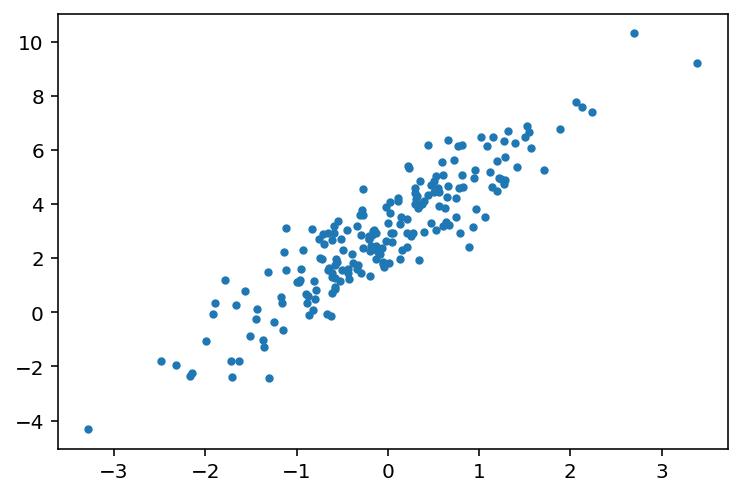

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

n_samples = 200
x = np.random.randn(n_samples) # x 생성 
# np.random.randn : 정규분포 갖는 랜덤 넘버 생성 
# 계수 및 절편
w = 2
b = 3
# 노이지 추가 : 1.0* np.random.randn(n_samples)
y = w*x + b + 1.0* np.random.randn(n_samples) # 실제 y 값 생성
plt.scatter(x,y, s=10)

위 그래프, 즉 주어진 x와 y의 값에서 가장 잘 fitting 되는 직선의 기울이와 절편이 2와 3인지 확인해보자! 

In [8]:
np.corrcoef(x,y) ##pearson 상관계수 계산 

array([[1.        , 0.90909724],
       [0.90909724, 1.        ]])

In [16]:
#fitting을 하려면 적어도 2차원 array로 만들어줘야하기 때문에. 
x[:5].reshape(-1,1)

array([[1.23826818],
       [1.71622224],
       [0.231745  ],
       [0.32116874],
       [0.29893016]])

In [17]:
from sklearn.linear_model import LinearRegression
leg = LinearRegression() # (1) 모델 생성
leg.fit(x.reshape(-1,1), y) # (2) 학습

print(leg.coef_) # w
print(leg.intercept_) # b

[2.09790134]
3.0049479690943075


## 모델을 예측에 사용하기

In [18]:
leg.predict([[1],[5],[10]]) # (3) 모델 사용(회귀, 분류) inference

array([ 5.10284931, 13.49445467, 23.98396137])

## 경사하강법 구현

변수가 1개인 경우
--

In [21]:
num_epoch = 10
lr = 1.0 #얘를 작게 줄 수록 학습을 느리게 함. 따라서 적당한 값을 주어야한다. 

w = np.random.uniform()
b = np.random.uniform()
print(w,b)

for epoch in range(num_epoch): # 경사하강법 구현
    y_pred = w*x + b
    error = np.abs(y_pred - y).mean()
    print(f"{epoch:2} w = {w:.6f}, b = {b:.6f} , error = {error:.6f}")
    #GD algorithm : {epoch:2} w = {w:.6f}, b = {b:.6f} , error = {error:.6f}

    w = w - lr*((y_pred - y)* x).mean() 
    b = b - lr*((y_pred - y)).mean()

0.3937417401236475 0.0007322492537185088
 0 w = 0.393742, b = 0.000732 , error = 3.070811
 1 w = 1.925279, b = 2.914853 , error = 0.795655
 2 w = 2.091741, b = 2.995822 , error = 0.774981
 3 w = 2.097369, b = 3.004622 , error = 0.774929
 4 w = 2.097880, b = 3.004920 , error = 0.774919
 5 w = 2.097900, b = 3.004947 , error = 0.774919
 6 w = 2.097901, b = 3.004948 , error = 0.774919
 7 w = 2.097901, b = 3.004948 , error = 0.774919
 8 w = 2.097901, b = 3.004948 , error = 0.774919
 9 w = 2.097901, b = 3.004948 , error = 0.774919


변수가 2개인 경우
--

In [23]:
n_samples = 200
x1 = np.random.randn(n_samples)
x2 = np.random.randn(n_samples)

y = 2 * x1 + 3 * x2 + 4  + 1.0*np.random.randn(n_samples)

leg = LinearRegression()
X = pd.DataFrame({'x1':x1, 'x2':x2})
leg.fit(X, y)

print(leg.coef_)
print(leg.intercept_)

[1.95430107 3.09085349]
3.9962617655506962


In [24]:
leg.score(X,y) # R square

0.9244942589718869

경사하강법
--

In [32]:
num_epoch = 40
lr = 1.5

w1 = np.random.uniform()
w2 = np.random.uniform()
b = np.random.uniform()

for epoch in range(num_epoch):
    y_pred = w1*x1 + w2*x2 + b
    error = np.abs(y_pred - y).mean()
    print(f"{epoch:2} w1 = {w1:.6f},  w2 = {w2:.6f}, b = {b:.6f} , error = {error:.6f}")

    w1 = w1 - lr*((y_pred - y)* x1).mean()
    w2 = w2 - lr*((y_pred - y)* x2).mean()
    b = b - lr*((y_pred - y)).mean()

 0 w1 = 0.827986,  w2 = 0.709369, b = 0.638868 , error = 3.510346
 1 w1 = 1.866868,  w2 = 4.351118, b = 5.250444 , error = 1.673328
 2 w1 = 2.221493,  w2 = 2.261465, b = 3.551080 , error = 1.171533
 3 w1 = 1.724446,  w2 = 3.719214, b = 4.112247 , error = 1.034791
 4 w1 = 2.124781,  w2 = 2.578493, b = 4.017320 , error = 0.943408
 5 w1 = 1.828810,  w2 = 3.523720, b = 3.920216 , error = 0.925261
 6 w1 = 2.049800,  w2 = 2.718786, b = 4.090796 , error = 0.887711
 7 w1 = 1.878628,  w2 = 3.413465, b = 3.899647 , error = 0.883657
 8 w1 = 2.016354,  w2 = 2.809831, b = 4.087803 , error = 0.861312
 9 w1 = 1.902144,  w2 = 3.336266, b = 3.912589 , error = 0.859623
10 w1 = 1.998862,  w2 = 2.876236, b = 4.071325 , error = 0.845009
11 w1 = 1.915840,  w2 = 3.278691, b = 3.929607 , error = 0.846009
12 w1 = 1.987702,  w2 = 2.926379, b = 4.055112 , error = 0.835694
13 w1 = 1.925187,  w2 = 3.234909, b = 3.944471 , error = 0.837982
14 w1 = 1.979733,  w2 = 2.964663, b = 4.041755 , error = 0.829658
15 w1 = 1.